# Batch and Online Learning: 

In `batch learning`, the system is incapable of learning incrementally: it must be trained using __all the available data__.

This will generally take a lot of time, and computing resources, so it it typically done offline. 
First, the system is trained, and then it is launched onto production and runs without learning anymore; it just applied what it has learned. 

- when needed to train on new data(new type of spam), needs to learn from scratch with onl and new data. 
- can be done automatically
- if system needed to adapt to rapidly changing data(predicting stock prices) , not a good option as you would need atleat a day/week to train 1 model. 
- requires alot of computer resources cause you are using a lot of data straight away. 

In `online learning`, you train the system incrementally by feeding it data / instances sequentially, either individually or by small groups called `mini-batches`. 

- sytem can learnin about new data, on the fly, as it arrives. 
- good if your sytem needs to adpat tp rapidly changing data. 
- good if you're low on computer resources 
- can be used to train systems on huge datasets that cannot fit in one machine's main memory ( this is called `out of core` learning). This algortithm loads a part of the data, runs a training step on that data, and repeats until it has run on all the data. 
- __Note: The whole process is usually done `offline`, that is, not on the live system, so online learning can be a confusing name. Think of it as `incremental learning`. 

# Learning Rate: 

### DOUBT: 
One important parameter of online learning sytems is how fast they should adapt to changing data: This is called `learning rate`.  
If you set a high learning rate, then your system will rapidly adapt to new data, but it will also tend to forget the old data(you don't want a spam filter to only spam the latest kinds of spam it was shown).  
Conversely, if you set a low leanring rate, the system will have more inertia: that is, it will learn more slowly, but it will also be less sensitive to noise in the new data, or to sequnces of non representative data points. 

__Side Note: __  A big challenge of online learning is that if bad data is given to the learning algorithm, the system's performance will start ot decline. 
- monitor your system closely and promptly switch lerning off ( and possibly revert to a previously working state) if you detect a drop in performance. 
- You may also want to monitor the input data using an `anomaly detection algorithm`. 

# Instance Based - vs - Model Based Learning:
`On the basis of how machine learning algorithms generalize`

In `instance based learning`, the system leanrs the examples by heart, then generalizes to new cases using a similarity measure. 

- Eg: Spam Emails, similarity measure: words in common with known spam emails

In `model based learning`, we build a model that best generalizes to out training data. Then, we use that model to make predictions. 

`Model Selection`: The process of choosing the model you want to represent the data you have. 
Eg: Linear Model of life satisfaction with just one attribute, GDP per capita. 

# Measuring your model:

- __`Utility/Fitness Function:`__ Measures how good your model is. 
- __`Cost/Error Function:`__ Measures how bad your model is. 

# Main Challenges of Machine Learning: 

- bad algorithm
- bad data

> __ The unreasonable Effectiveness of Data:__  

In a famous paper published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different Machine Learning Algorithms, including fairly simple ones, performed almost identically well on a complex problem of [natural laguage disambiguation](https://en.wikipedia.org/wiki/Disambiguation_(disambiguation)(For eg: whehter to write "to", "two", "too" depending on the context) once they were given enough data.    

- say that more effort should be put in corpus development than on algorithm development. 

> __Nonrepresentative Training Data:__    

- By using nonrepresentative training set, we tran a model that is unlikely to make accurate predictions especially for some edge case (Here: very poor and very rich countries) . 
- `Sampling Bias:` It is crucial that the training set be representative of the cases you want to generalise to. This is often harder that it sounds, if the sample is too small, you will have `sampleing noise`(i.e non representative data as a result of chance) but even very large samples can be non representative if the sampling mehthod is flawed.  

- Eg: Landon should have won(57%) , instead Roosevelt won(62%).  

> __Poor Quality Data: __   

- clean up your data of any noise, errors, or outliers 
- if some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually. 
- If some instances are missing a few features(eg: 5%  of your customers did not specify their age) , you must decide whether to ignore this attribute(age) altogether, or ignore these instances. You may also fill the missing values with `NaN`. Or, you may train 1 model using `ages`, and one model without using `ages`. 

> __Irrelevant Features: __

- garbage in, garbage out. 
- Proceses of `Feautre Engineering` involves:   
    - i) `Feature Selection`: Selecting the most useful features to train on.   
    - ii) `Feature Extraction`: Combining existing features to create more useful ones ( dimensionality reduction algorithms can help, eg: use area, instead of using length, breadth) 
    - iii) Creating new features by gathering new data.    


> __Overfitting (High Variance) the training data: __  

- model performs well on the training data, but does  not generalise well. 
- Complex models such as deep neural networks can detect subtle patterns in the data, but if the training data is noisy, or if it is too small(which introduces sampling noise), then the model is likely to detect patterns (and learn them) in the noise itself. 
- Eg: all countires with a `w` in their name have high life satisfaction index. 
- Overfitting hapens when the model is too complex relative to the ammount and noisiness of the training data. 
- Possible Solutions: 
    - simplify model by selcting fewer parameters (eg: linear model vs high degree polynomial model) 
    - dimensionality reduction, reduce number of attributes. 
    - constraining the model (`regularzation techniques`) 
    
    - gather more training data
    - reduce noise ( outliers , errors and missing values in the data)   
    
    - __ You want to find the right balance between fitting the data perfectly, and keeping the model as simple as possible to ensure that it will generalize well. __    
    
__ Regularization: __  Penalizing the parameters of a model so that they do not overfit too much to the training data. 
- The ammount of regularization to apply during learning can be controlled by a `hyperparameter`. Note: A `hyperparameter` is a parameter of a learning algorithm (not of the model).  It must be set prior to training, and remains contant throughout training.   

> __Underfitting (High Bias) the training data: __   

- occurs when your model is too simple to understand the underlying structure of the data.  
- Possible Solutions:  
    - Select a more poweful/ complex model ( Eg: Nerual Network instead of logitic regression)  
    - Use more attributes/ parameters
    - Feed best feautres to the learning algorithm ( `feature engineering`. 
    - reducing constains on the model ( eg: the `regularization hyperparameter`)  


# Testing and Validating:  

- Split your data into 2 sets, `training` set and `test` set.  
- The error rate on new cases is called the `generalization error` ( or `out of sample error`), and by evaluating your model on the test set, you get the estimation of this error. This error basically tells you how well your model will perform on instances it has never seen before ( or how well it will generalize).  
- __TIP:__ It is common to make a 80-20 split for training and testing set.  
- Information from the test set can `bleed into` the model if you use the test set to tweak the `regularization hyperparameter`. As a result, you model performs well on your test set, but doesn't do _that much well_ ont newly seen data.  
- Soluton:   
    - `Validation Set`:  Used to make decision regarding hyperparameters and complexity of the model. 
    
    i ) Preparing For Exam: Train your multiple models with various hyperparameters using the __training set__.   
    ii ) Doing Sample Papers: Select the model that performs best on the __validation set__.    
    iii ) Giving The Exam: Run a single final test on the __test set__ to get an estimate of the generalization error.    
    
    
- Now, you notice that we kind of "wasting" the data allocated to the tesing set. We cannot use it until the very end. How can we not "waste" this test data, use this test to train our model, but at the same time, not cheat?   
- Answer:  [Cross Validation](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/89692644-156f-4447-8601-ce46b5f1c572/lessons/bc61c575-ae7c-4243-bfc2-bff377e7216a/concepts/a5290356-4c84-4cd0-9af3-dc8e06117fb4): 
    - Randomize your data
    - Break your data into K buckets
    - Train your model K times, each time using a different bucket as our testing set, and the remaining points as our traing set. 

__Side Notes:__
- [os](https://www.youtube.com/watch?v=wgHeTJtth0w), [os.path.join()](http://www.diveintopython.net/file_handling/os_module.html)
- [plt.tight_layout()](https://matplotlib.org/users/tight_layout_guide.html) `tight_layout` 
    - automatically adjust subplot params so that the subplot(s) fits in to the figure area. 
    - adjusts axes, doesn't let them overlap
    - adjust spacing between subplots to minimise overlaps

In [1]:
# Common Imports 
import numpy as np
import numpy.random as rnd
import os

# try to make this notebook's output stable across 
# runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Setting some default matplotlib values
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to sabe the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""

# What does os.path.join do? 
path = os.path.join(PROJECT_ROOT_DIR, "images", 
                       CHAPTER_ID, "some_fig_id" + ".png")
print(path)
# >> ./images/fundamentals/some_fig_id.png
# >> Creates a file path, wherein, we will save the image. 

def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", 
                       CHAPTER_ID, fig_id + ".png")
    print("Saving figure ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format ='png', dpi = 300)

./images/some_fig_id.png


# Load and Prepare Life Satisfaction Data:  

In [2]:
import pandas as pd

# Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI

datapath = "datasets/lifesat/"

oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv",
                       thousands = ",")
# >> The thousands is a seperator. 
print(oecd_bli.shape)
oecd_bli.head()

(3292, 17)


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [3]:
# Boolean Indexing only those rows with "TOT" in the 
# "INEQUALITY" column
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli.shape
# >> Reduce the number of rows from 3292 to 888. 

(888, 17)

- [pivot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html)  
    - Reshapes the data(produces a "pivot" table) based on column values.  
    - Uses unique values from index/columns to form axes of the resulting DataFrame 

In [4]:
df = pd.DataFrame({ 'foo': ['one', 'one', 'one',
                            'two', 'two', 'two'],
                   'bar': ['A', 'B', "C", 'A', "B",
                          'C'],
                   'baz': [1,2,3,4,5,6]
                  })
df
#     foo   bar  baz
# 0   one   A    1
# 1   one   B    2
# 2   one   C    3
# 3   two   A    4
# 4   two   B    5
# 5   two   C    6

pivotted_df = df.pivot(index = 'foo',
               columns = 'bar', 
               values = 'baz')
# According to the documentation: 
# New index values, will be the unique values from
# index = 'foo', that is 'one' and 'two' 
# New columns will be the unique values from 
# columns = 'bar', that is 'A', 'B', 'C'
# Column name used to populate new frame's values: 
# values = 'baz' 

#>>       A   B   C
#>>  one  1   2   3
#>>  two  4   5   6

In [5]:
print(oecd_bli["Country"].values.shape)
# >> ['Australia' 'Austria' 'Belgium' ..., 'Russia'
# 'Slovenia' 'OECD - Total']
# >> (888,)

print(oecd_bli["Indicator"].values.shape)
# >> ['Dwellings without basic facilities' 'Dwellings without basic facilities'
#  'Dwellings without basic facilities' ...,
#  'Time devoted to leisure and personal care'
#  'Time devoted to leisure and personal care'
#  'Time devoted to leisure and personal care']
# >> (888,)

print(oecd_bli["Value"].values.shape)
# >> [  1.1    1.     2.   ...,  14.75  14.12  14.74]
# >> (888, )


(888,)
(888,)
(888,)


In [6]:
oecd_bli = oecd_bli.pivot(index = "Country", 
                         columns = "Indicator", 
                         values = "Value")
oecd_bli

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


__So uptill now, what have we done? __

- Only considering data rows where `INEQUALITY == "TOT" `
- pivotted the dataframe, to show: 
     - `index`: Country_Names
     - `Columns`: Different Indicators, for each country    
     - ` values`: using the column "Value" to get the corresponding value to the country-indicator combination.  
     
Now, all that's left is to extract the "Life satisfaction" column from the dataframe.  

In [7]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data: 

In [8]:
# Download the data from http://goo.gl/j1MSKe (=> imf.org)  
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",
                            thousands = ',',
                            delimiter = "\t",
                            encoding = 'latin1',
                            na_values = "n/a")
# DOUBT: What does delimiter, encoding and 
# na_values do in this code? 

gdp_per_capita.rename(columns = {'2015': "GDP per capita"}, inplace = True)
# Renaming column, inplace. 

gdp_per_capita.set_index("Country", inplace = True)
# Use country as the row index, instead of 0,1,2...

gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


- [pd.merge](http://localhost:8888/notebooks/Downloads/handson-ml-master/tools_pandas.ipynb)  
__See Code Block 134__


In [9]:
full_country_stats = pd.merge(left = oecd_bli,
                             right = gdp_per_capita,
                             left_index = True,
                             right_index = True) 
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,14.90,64.0,79.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17288.083,2014.0


In [10]:
full_country_stats.sort_values(by = "GDP per capita",
                              inplace = True)
# >> Sorting by column: GDP per capita
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [11]:
full_country_stats[["GDP per capita", "Life satisfaction"]]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


In [12]:
# Side note, you can use .iloc with an array of indices
# also. 
x = pd.Series([1,2,3,4,5,6])
print(x.iloc[[0,2,3]])


0    1
2    3
3    4
dtype: int64


In [13]:
remove_indices = [0,1,6,8,33,34,35]
keep_indeces = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[
    ["GDP per capita",
    "Life satisfaction"]].iloc[keep_indeces]
print(sample_data.shape)
# >> (29,2)
sample_data

(29, 2)


,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [14]:
missing_data = full_country_stats[
    ["GDP per capita",
    "Life satisfaction"]].iloc[remove_indices]
print(missing_data.shape)
# >> (7,2)
missing_data

(7, 2)


,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


- [Plotting in Pandas](http://localhost:8888/notebooks/Downloads/handson-ml-master/tools_pandas.ipynb): See Code block 24, 91. 

In [15]:
sample_data.loc["Australia"]

GDP per capita       50961.865
Life satisfaction        7.300
Name: Australia, dtype: float64

Saving figure  money_happy_scatterplot


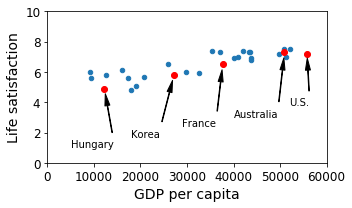

In [16]:
sample_data.plot(kind = 'scatter', x="GDP per capita",
                y = "Life satisfaction", figsize = (5,3))
# >> Normal Blue Scatter Plot 


plt.axis([0, 60000, 0, 10])
# >> [xmin, xmax, ymin, ymax]


position_text = {
    "Hungary": (5000,1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8)
}
# >> Some countries to highlight on the scatter plot 


for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    # >> Will return a pandas Series, with GDP and Life
    # satisfaction information about that country. 
    # Those will get assigned to pos_data_x, pos_data_y,
    # respectively. 
    
    
#     country = "U.S." if country == "United States" else country
    if country == "United States":
        country = "U.S."
    else:
        country = country
        
    # >> Annotating the countries in the position_text
    # dictionary for the blue scatter plot. 
    plt.annotate(country, # Text you want to enter
                 xy = (pos_data_x, pos_data_y), 
                 # Point you want to point at
                xytext = pos_text, # postion of the text 
                arrowprops = dict(facecolor = 'black',
                                 width = 0.5, # Lower end width 
                                 shrink = 0.1, # How much it shrinks on the head 
                                 headwidth = 5))


    # Highlighting the particular countries in 
    # position_text with red points, instead of having
    # blue points in the normal scatter plot. 
    plt.plot(pos_data_x, pos_data_y, "ro")
    
save_fig("money_happy_scatterplot")  

In [17]:
# >> Saving dataframe of sample_data in the form
# .csv
sample_data.to_csv("life_satisfaction_vs_gdp_per_capita.csv")

In [18]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


In [19]:
from sklearn.linear_model import LinearRegression

# Selecting a linear model 
lin1 = LinearRegression()

# Chossing our x's and y's
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

# DOUBT: Why was it not working when i did not add the
# np.c_ function to above x's and y's. 
# It was showing inconsistent sampling.. 

# Train the model
lin1.fit(Xsample,ysample)

t0, t1 = lin1.intercept_, lin1.coef_
# >> t0 or lin1.intercept refers to the y intercept
# >> t1 or lin1.coef_ refers to the slope of the line
t0, t1
# >> (array([ 4.8530528]), array([[  4.91154459e-05]]))

(array([ 4.8530528]), array([[  4.91154459e-05]]))

Saving figure  best_fit_model_plot


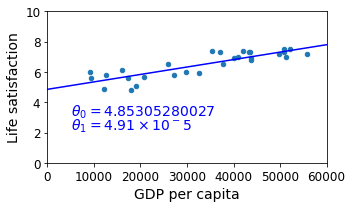

In [20]:
sample_data.plot(kind = 'scatter', x = 'GDP per capita',
                y = 'Life satisfaction', figsize = (5,3))

plt.axis([0, 60000, 0, 10])

X = np.linspace(0, 60000, 1000)
# >> returns an array (1-D) containing a specifc number of points 
# (1000 here) evenly distributed between two values 
# (0 and 60000 here) 
y = t0 + t1*X
# >> y.shape: (1, 1000)

plt.plot(X, y.reshape(1000,) , "b")
# >> Will draw a blue line, with X = X
# >> and y = t0 + t1*X (best fitting model) 
# >> y needed to be reshaped as the first dimensions of 
# X and y need to be same. 

plt.text(5000, 3.1, # x,y position 
        r"$ \theta{_0} = $"+str(t0[0]), 
        # r used to denote that the next thing is
        # an equation
        # DOUBT: Without r in front of the string
        # the latex works just fine, except for 
        # \theta, it reads it as heta.
        fontsize = 14,
        color = 'b'
        )
plt.text(5000, 2.2, # x,y position 
        r"$ \theta{_1} = 4.91 \times 10^-5$", 
        # r used to denote that the next thing is
        # an equation
        # DOUBT: Without r in front of the string
        # the latex works just fine, except for 
        # \theta, it reads it as heta.
        fontsize = 14,
        color = 'b'
        )

save_fig("best_fit_model_plot")

__Let's get some data about the island of Cyprus: __

In [21]:
cyprus_gdp_per_capita = gdp_per_capita.loc['Cyprus']["GDP per capita"]
cyprus_gdp_per_capita

22587.490000000002

In [22]:
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction


array([[ 5.96244744]])

We don't have the actual Cyprus Life Satisfaction data in our `full_country_stats`.  
From the internet, it is not clear. http://litsonline-ebrd.com/countries/cyprus/   
48 per cent of respondents on the island report being satisfied with life, compared with 43 per cent in the transition region. Older cohorts, men and respondents in the middle and upper income groups appear more satisfied than their counterparts. 


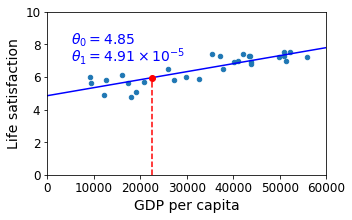

In [36]:
sample_data.plot(kind='scatter', 
                 x="GDP per capita", 
                 y='Life satisfaction', 
                 figsize=(5,3), 
                 )

X=np.linspace(0, 60000, 1000)

y = t0 + t1*X
plt.plot(X, y.reshape(1000,) , "b")

plt.axis([0, 60000, 0, 10]) 

plt.text(5000, 8, r"$\theta_0 = 4.85$",
         fontsize=14, 
         color="b")

plt.text(5000, 7, r"$\theta_1 = 4.91 \times 10^{-5}$",
         fontsize=14, 
         color="b")

# Highlighting the prediction of Cyprus's life satisfaction 
# with a red point
plt.plot(cyprus_gdp_per_capita, 
         cyprus_predicted_life_satisfaction,
        'ro')

# Drawing a red dotted line to emphasis the relation
# between Cyprus's GDP, and Cyprus's predicted life
# satisfaction. 
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],# x
        [0, cyprus_predicted_life_satisfaction],# y 
        "r--")
# >> Joins the points (cyprus_gdp_per_capita , 0) and
# >> (cyprus_gdp_per_capita, 
# >> cyprus_predicted_life_satisfaction)
# >> with a red dotted line. 